# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [8]:
from commonfunctions import *
from scipy.signal import convolve2d
import skimage


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

(280, 272)


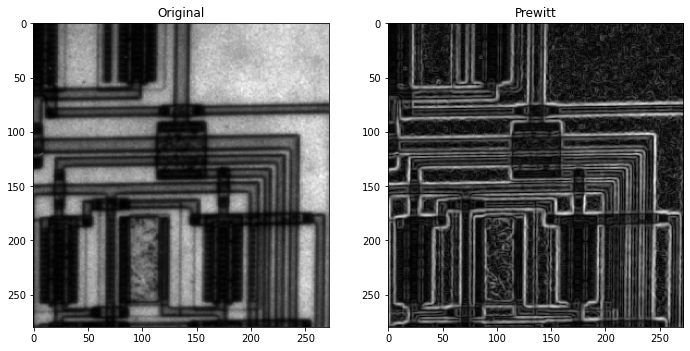

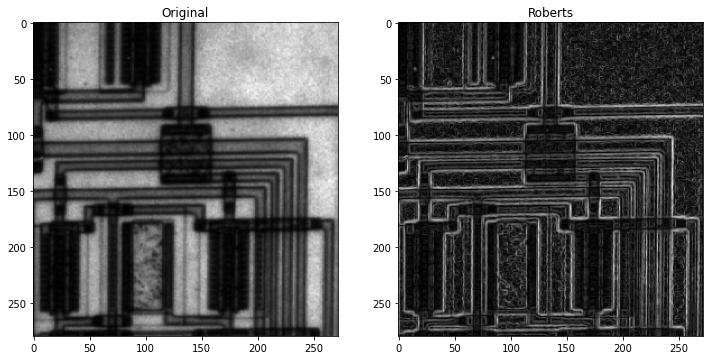

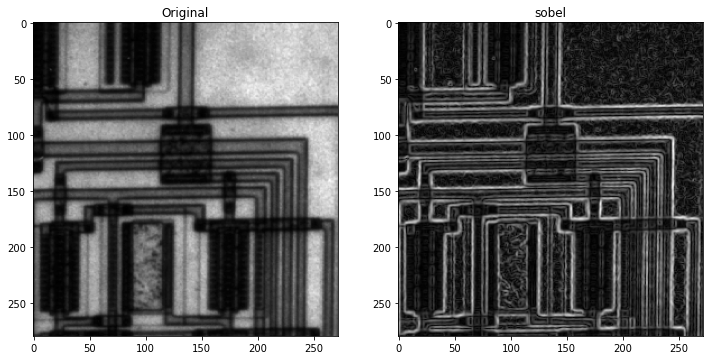

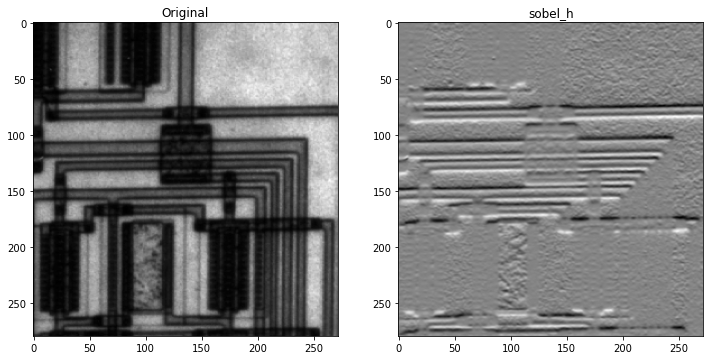

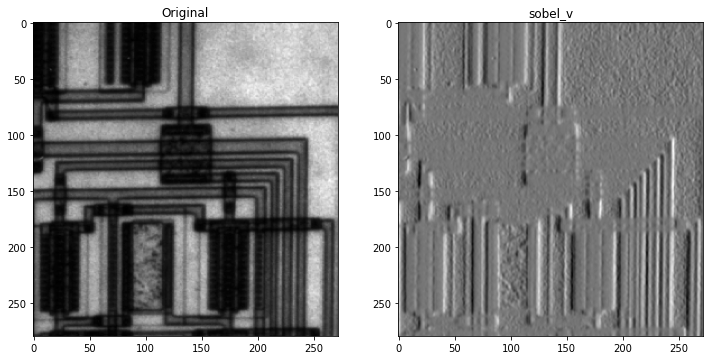

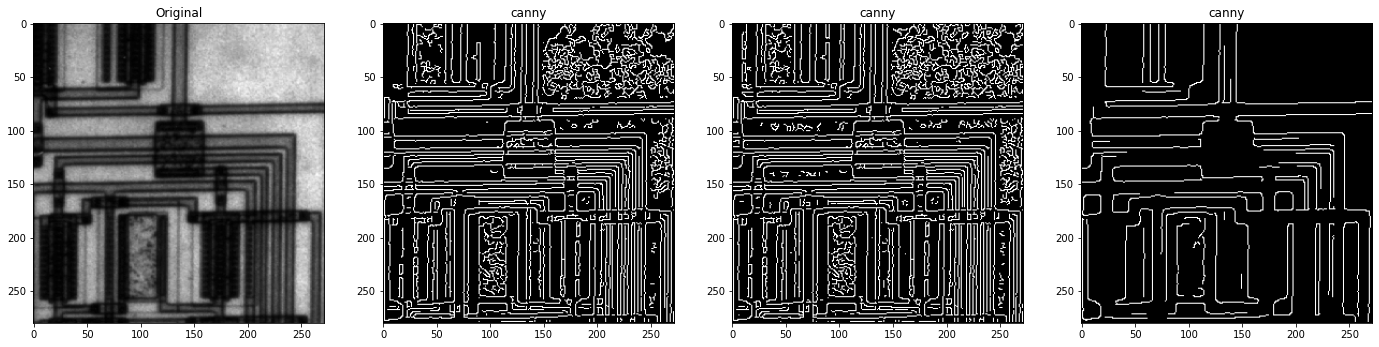

In [10]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img = io.imread('circuit.tif')


show_images([img, prewitt(img),  prewitt(img, )], ['Original', 'Prewitt'])
show_images([img, roberts(img)], ['Original', 'Roberts'])
show_images([img, sobel(img)], ['Original', 'sobel'])
show_images([img, sobel_h(img)], ['Original', 'sobel_h'])
show_images([img, sobel_v(img)], ['Original', 'sobel_v'])
show_images(
    [
        img,
        canny(img, sigma=1, low_threshold=10, high_threshold=35),  
        canny(img, sigma=1, low_threshold=10, high_threshold=25), 
        canny(img, sigma=1.5, low_threshold=50, high_threshold=70)
    ],
    ['Original', 'canny', 'canny', 'canny']
)




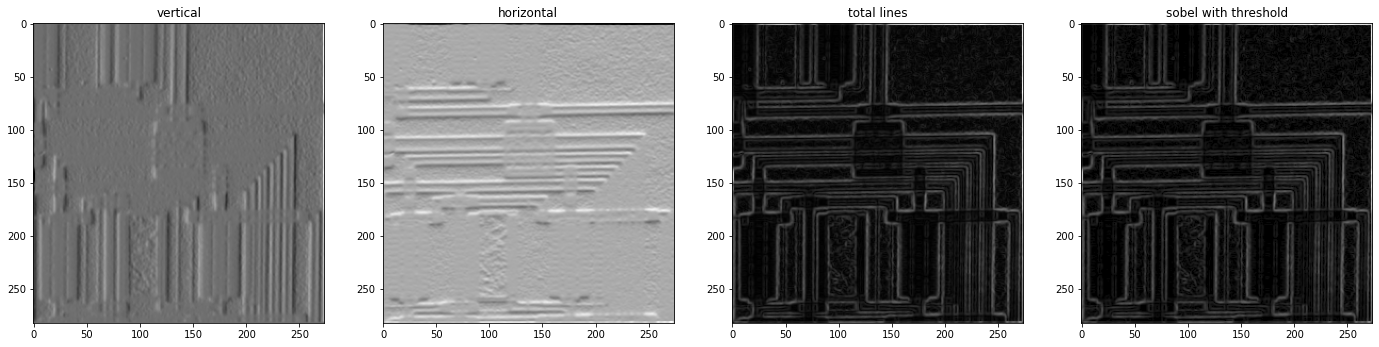

In [11]:
# 2. Custom Sobel (V-H-Both)
hx = np.array([
    [-1, 0, 1],
    [-2, 0, 2], 
    [-1, 0, 1]
])

hy = np.array([
    [-1, -2, -1],
    [0, 0, 0], 
    [1, 2, 1]
])

x_img = convolve2d(img, hx)
y_img = convolve2d(img, hy)
sobel = np.sqrt(x_img ** 2 + y_img ** 2)
sobel_threshold = sobel.copy()
threshold = 20
sobel_threshold[sobel_threshold < threshold] = 0
# sobel_threshold[sobel_threshold >= threshold] = 1
show_images([x_img, y_img, sobel, sobel_threshold], ['vertical', 'horizontal', 'total lines', 'sobel with threshold'])



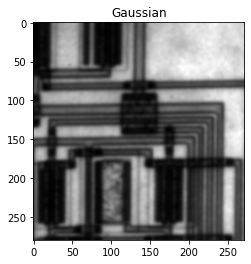

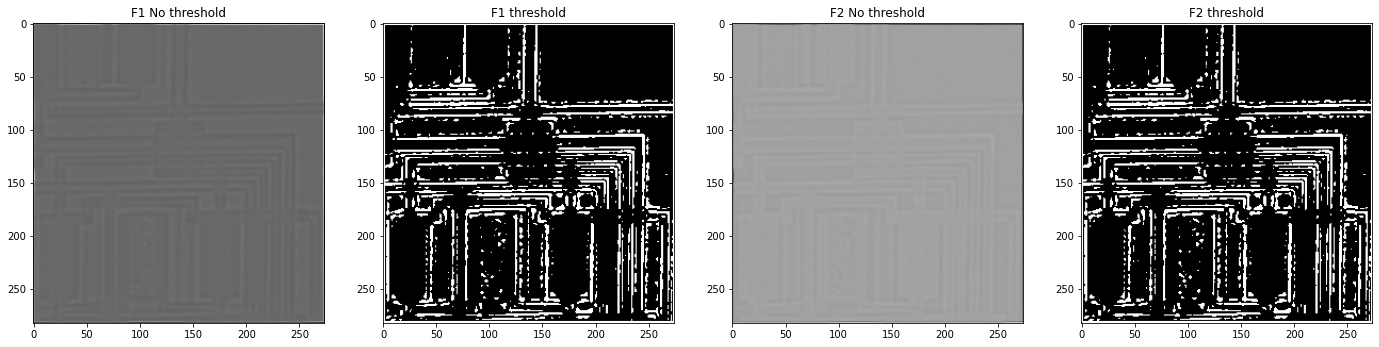

In [12]:
# 3. Custom LoG
thres1 = 15
thres2 = 5
gaussian_img = skimage.filters.gaussian(img, sigma=1.5)
show_images([gaussian_img], ['Gaussian'])
f1 = np.array([
    [-1, -1, -1],
    [-1, 8, -1], 
    [-1, -1, -1]
])

f2 = np.array([
    [0, 1, 0],
    [1, -4, 1], 
    [0, 1, 0]
])

gaussian_img *= 255
# gaussian_img = gaussian_img.astype(np.uint8)
# print(gaussian_img)
f1_img = convolve2d(gaussian_img, f1)
f2_img = convolve2d(gaussian_img, f2)

f1_img_thr = f1_img.copy()
f1_img_thr = np.abs(f1_img_thr)
f1_img_thr[f1_img_thr < thres1] = 0 
f1_img_thr[f1_img_thr >= thres1] = 255 

f2_img_thr = f2_img.copy()
f2_img_thr = np.abs(f2_img_thr)
f2_img_thr[f2_img_thr < thres2] = 0
f2_img_thr[f2_img_thr >= thres2] = 255 

show_images([f1_img, f1_img_thr, f2_img, f2_img_thr], ['F1 No threshold', 'F1 threshold', 'F2 No threshold', 'F2 threshold'])






[[0.05882353 0.05882353 0.05882353 ... 0.58039216 0.56470588 0.55686275]
 [0.0627451  0.05490196 0.05490196 ... 0.52941176 0.56470588 0.59215686]
 [0.0627451  0.0627451  0.05490196 ... 0.5254902  0.55294118 0.59607843]
 ...
 [0.14117647 0.23137255 0.30588235 ... 0.34117647 0.29803922 0.23921569]
 [0.12156863 0.17647059 0.20784314 ... 0.34509804 0.29803922 0.24705882]
 [0.10588235 0.15294118 0.18431373 ... 0.34117647 0.29019608 0.24313725]]
[[0.05882353 0.05882353 0.05882353 ... 0.58039216 0.56470588 0.55686275]
 [0.0627451  0.05490196 0.05490196 ... 0.52941176 0.56470588 0.59215686]
 [0.0627451  0.0627451  0.05490196 ... 0.5254902  0.55294118 0.59607843]
 ...
 [0.14117647 0.23137255 0.30588235 ... 0.34117647 0.29803922 0.23921569]
 [0.12156863 0.17647059 0.20784314 ... 0.34509804 0.29803922 0.24705882]
 [0.10588235 0.15294118 0.18431373 ... 0.34117647 0.29019608 0.24313725]]


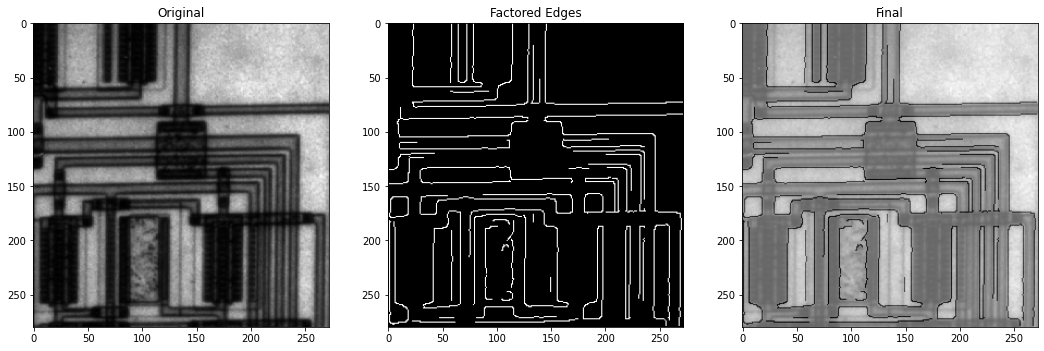

In [13]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
edge_img = canny(img, sigma=1.5, low_threshold=50, high_threshold=70)
# edge_img *= 255
edge_img = edge_img.astype(np.float64)

img = img.astype(np.float64)
img /= 255
print(img)

edge_img *= 0.5
final_img = np.subtract(img, edge_img)
print(final_img)

show_images([img, edge_img, final_img], ['Original', 'Factored Edges', 'Final'])
